In [2]:
from typing import Tuple
import pandas as pd
import numpy as np

from pathlib import Path
from matplotlib import pyplot, image

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
def returnAnnotations(file_attributos, file_annotations):
  df_attributes = pd.read_csv(file_attributos, header = None)
  list_attributes = list()
  list_attributes.append(df_attributes[0].values)
  handle = open(file_annotations)
  scores = dict()
  confidence = dict()
  for line in handle:
      words = line.split()
      i=0
      for word in words:
          if i == 0:
              scores[word]=list()
              confidence[word] = list()
              i+=1
          else:
              values = word.split(',')
              scores[words[0]].append(float(values[0]))
              confidence[words[0]].append(float(values[1]))
              i+=1
  scores = pd.DataFrame(scores).T
  scores.columns = list_attributes
  confidence = pd.DataFrame(confidence).T
  confidence.columns = list_attributes
  return scores,confidence


In [5]:
file_attributos = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/annotations/attributes.txt'
file_annotations = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/annotations/annotations.tsv'
file_training = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/holdout_split/training.txt'
file_test = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/holdout_split/test.txt'
def returnTrainingTest(file_attributos, file_annotations, file_training, file_test):
  scores,confidence = returnAnnotations(file_attributos, file_annotations)
  df_training = pd.read_csv(file_training, header = None)
  df_test = pd.read_csv(file_test, header = None)
  scores_training = scores[scores.index.isin(df_training[0].values)]
  scores_test = scores[scores.index.isin(df_test[0].values)]
  confidence_training = confidence[confidence.index.isin(df_training[0].values)]
  confidence_test = confidence[confidence.index.isin(df_test[0].values)]
  return scores_training, scores_test, confidence_training, confidence_test

In [6]:
scores_training, scores_test, confidence_training, confidence_test = returnTrainingTest(file_attributos, file_annotations, file_training, file_test)

In [7]:
scores_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [8]:
scores_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [9]:
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/101.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/106.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/107.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/109.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/92.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/93.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,4.0,5.0,6.0,6.0,6.0
90000014/95.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0


In [10]:
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/10.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,5.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/104.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/105.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/107.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/86.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/89.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/9.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0


In [11]:
confidence_training = confidence_training.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/101.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/106.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/107.jpg,1,1,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,1,1,1,1
00000064/109.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/92.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/93.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/95.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1


In [12]:
confidence_test = confidence_test.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/10.jpg,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/104.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/105.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/107.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/86.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/89.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/9.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1


In [13]:
#df_training = pd.DataFrame(scores_training*confidence_training, columns=scores_training.columns, index=scores_training.index)
df_training = scores_training
df_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [14]:
#df_test = pd.DataFrame(scores_test*confidence_test, columns=scores_test.columns, index=scores_test.index)
df_test = scores_test
df_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


# Verificação visual do balanço do banco de dados no conjunto de treino.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


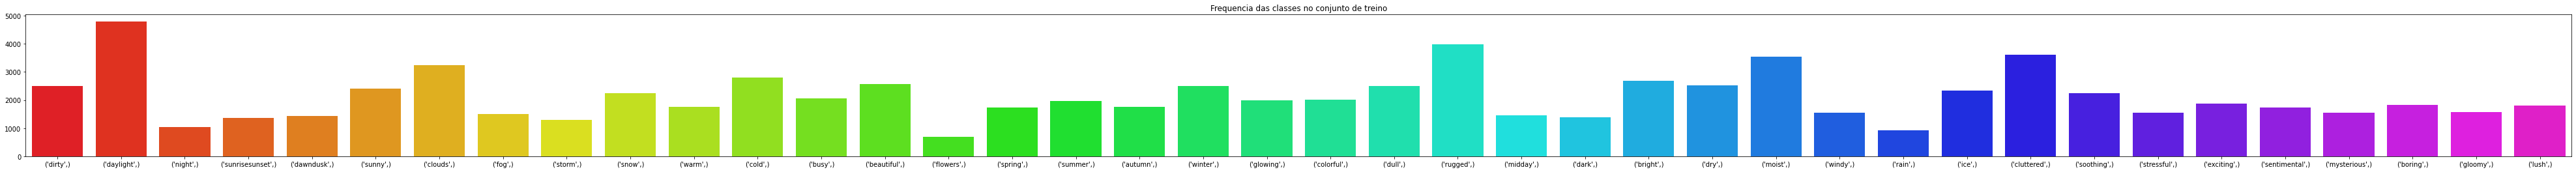

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_markdown
display_markdown('# Verificação visual do balanço do banco de dados no conjunto de treino.',raw=True)
plt.figure(figsize=(70, 4))
plt.title('Frequencia das classes no conjunto de treino')
palette = sns.color_palette('gist_rainbow', len(df_training.columns.values))
sns.barplot(df_training.columns.values, df_training.sum().values,palette=palette)

In [16]:
import os
def returnPathImages():
    imageLD = {}
    path_img = Path('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD')
    datasets = os.listdir(path_img)
    for dataset in datasets:
        imgs_name = os.listdir(path_img/Path(dataset))
        for name in imgs_name:
            img_file = path_img/Path(dataset)/Path(name)
            imageLD[str(Path(dataset)/Path(name))]=img_file
    return imageLD

In [17]:
images_paths = returnPathImages()

In [18]:
images_paths

{'00017672/20111213_003633.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/00017672/20111213_003633.jpg'),
 '00017672/20111223_143635.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/00017672/20111223_143635.jpg'),
 '00017672/20111223_010632.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/00017672/20111223_010632.jpg'),
 '00017672/20120102_170634.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/00017672/20120102_170634.jpg'),
 '00017672/20120101_143632.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/00017672/20120101_143632.jpg'),
 '00017672/20120101_200631.jpg': PosixPath('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD/000176

In [19]:
df_training_image = df_training[df_training.index.isin(images_paths.keys())]
df_training_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [20]:
df_test_image = df_test[df_test.index.isin(images_paths.keys())]
df_test_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [21]:
iter_img = iter(images_paths.items())

In [22]:
a_name, a_img = next(iter_img)

In [23]:
image.imread(a_img)

array([[[184, 158, 157],
        [180, 160, 153],
        [179, 163, 150],
        ...,
        [194, 158, 144],
        [197, 162, 143],
        [196, 161, 141]],

       [[179, 156, 162],
        [179, 159, 160],
        [179, 161, 159],
        ...,
        [197, 160, 142],
        [198, 159, 142],
        [198, 159, 142]],

       [[184, 165, 171],
        [185, 166, 172],
        [183, 162, 169],
        ...,
        [201, 162, 145],
        [201, 162, 147],
        [199, 160, 145]],

       ...,

       [[ 35,  29,  29],
        [ 37,  28,  29],
        [ 38,  29,  30],
        ...,
        [ 47,  36,  30],
        [ 46,  36,  27],
        [ 45,  35,  26]],

       [[ 35,  31,  32],
        [ 34,  28,  28],
        [ 38,  30,  28],
        ...,
        [ 46,  36,  27],
        [ 45,  35,  26],
        [ 44,  34,  25]],

       [[ 34,  32,  33],
        [ 34,  30,  29],
        [ 35,  30,  27],
        ...,
        [ 44,  38,  26],
        [ 44,  35,  26],
        [ 46,  35,  31]]

In [24]:
a_name

'00017672/20111213_003633.jpg'

In [25]:
df_test.loc[a_name]

dirty            0.591720
daylight         0.887460
night            0.036487
sunrisesunset    0.579000
dawndusk         0.475980
sunny            0.088939
clouds           1.000000
fog              1.000000
storm            0.481760
snow             0.052398
warm             0.347450
cold             0.671160
busy             0.526800
beautiful        0.253990
flowers          0.038157
spring           0.498010
summer           0.099467
autumn           0.091839
winter           0.431440
glowing          0.163550
colorful         0.201440
dull             0.764070
rugged           0.512630
midday           0.137680
dark             0.038936
bright           0.303290
dry              0.050625
moist            0.958850
windy            0.523520
rain             0.438880
ice              0.111940
cluttered        0.453310
soothing         0.257960
stressful        0.599650
exciting         0.363050
sentimental      0.560210
mysterious       0.490240
boring           0.752560
gloomy      

In [26]:
images_paths_train = {k: v for k, v in images_paths.items() if k in df_training.index}

In [27]:
images_paths_teste = {k: v for k, v in images_paths.items() if k in df_test.index}

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [29]:
import cv2

In [30]:
import time


In [31]:
n_imgs = 100
X_train = []
y_train = []
start = time.time()
for i, (img_name, img_path) in enumerate(images_paths_train.items()):
    if i % 100 == 0:
        now = time.time()
        print(f'{i} of {len(images_paths_train)} ({now-start}s ellapsed) reading image {img_name}')
    img = image.imread(img_path)
    x = cv2.resize(img, (200,200))
    x = x.flatten()
    X_train.append(x)
    y_train.append(df_training.loc[img_name].values)
    del img

0 of 6904 (0.00011587142944335938s ellapsed) reading image 00005381/20110115_141022.jpg
100 of 6904 (3.9856150150299072s ellapsed) reading image 00005381/20120613_194039.jpg
200 of 6904 (69.18938565254211s ellapsed) reading image 90000012/2.jpg
300 of 6904 (139.8438925743103s ellapsed) reading image 90000014/200.jpg
400 of 6904 (210.01068568229675s ellapsed) reading image 00008383/20111124_075220.jpg
500 of 6904 (279.9209723472595s ellapsed) reading image 00010801/20120704_123019.jpg
600 of 6904 (349.6774413585663s ellapsed) reading image 00008205/20110201_235719.jpg
700 of 6904 (418.50015330314636s ellapsed) reading image 00008205/20130321_142733.jpg
800 of 6904 (490.121533870697s ellapsed) reading image 00018118/20120330_025520.jpg
900 of 6904 (561.523756980896s ellapsed) reading image 00017709/20120321_154253.jpg
1000 of 6904 (631.3595147132874s ellapsed) reading image 00016845/20110607_153319.jpg
1100 of 6904 (700.4570615291595s ellapsed) reading image 00009053/20120121_065109.jpg


In [33]:
n_imgs = 100
X_teste = []
y_teste = []
for i, (img_name, img_path) in enumerate(images_paths_teste.items()):
    if i % 100 == 0:
        now = time.time()
        print(f'{i} of {len(images_paths_teste)} ({now-start}s ellapsed) reading image {img_name}')
    img = image.imread(img_path)
    x = cv2.resize(img, (200,200))
    x = x.flatten()
    X_teste.append(x)
    y_teste.append(df_test.loc[img_name].values)
    del img

0 of 1667 (6827.7621014118195s ellapsed) reading image 00017672/20111213_003633.jpg
100 of 1667 (6899.820780992508s ellapsed) reading image 90000013/197.jpg
200 of 1667 (6970.7675313949585s ellapsed) reading image 00008915/20110202_170529.jpg
300 of 1667 (7041.85991859436s ellapsed) reading image 00019000/78.jpg
400 of 1667 (7112.451364278793s ellapsed) reading image 00017660/20130331_012457.jpg
500 of 1667 (7183.8856863975525s ellapsed) reading image 90000008/101.jpg
600 of 1667 (7254.884787559509s ellapsed) reading image 00017659/20120301_022346.jpg
700 of 1667 (7328.414308547974s ellapsed) reading image 00018071/20120301_003852.jpg
800 of 1667 (7402.778532505035s ellapsed) reading image 00019919/20120907_002611.jpg
900 of 1667 (7476.04939866066s ellapsed) reading image 00000090/27.jpg
1000 of 1667 (7548.929509878159s ellapsed) reading image 00000260/274.jpg
1100 of 1667 (7620.671111106873s ellapsed) reading image 90000006/82.jpg
1200 of 1667 (7692.030250072479s ellapsed) reading ima

In [34]:
clf = MultiOutputRegressor(SVR(kernel='linear'))

In [ ]:
clf.fit(X_train, y_train)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_predicted = clf.predict(X_teste)

In [ ]:
y_predicted

In [ ]:
np.square(y_teste - y_predicted).mean()

In [ ]:
len(y_teste)

In [ ]:
len(y_teste[0])

In [ ]:
y_5 = np.repeat(0.5, len(y_teste[0]))

In [ ]:
y_5 = np.repeat([y_5], len(y_teste))

In [ ]:
y_5 = y_5.reshape((100, 40))

In [ ]:
np.square(y_teste - y_5).mean()

